In [1]:
### Importing libraries 
import holidays
import pandas as pd
import glob
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import folium
pd.set_option("display.max_columns",1000)
pd.set_option('display.max_rows', 17544) 
import matplotlib as mpl
from matplotlib import colors
import geopandas as gpd
import calendar
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
path = "/Users/sreevathsadb/Masters/Project/Data/"

/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Importing Historical dataset and creating new columns

In [2]:
df_11_18 = pd.read_csv(path + 'old/db_11_19.csv')

### Converting Time column into Timestamp datatype
df_11_18['TIME'] = pd.to_datetime(df_11_18['timestamp'], format='%Y-%m-%d %H:%M:%S')

#creating year, month, day, hour, minute, weekday columns for further data analysis and visualisation

df_11_18['year'] = pd.DatetimeIndex(df_11_18['timestamp']).year
df_11_18['month'] = pd.DatetimeIndex(df_11_18['timestamp']).month
df_11_18['day'] = pd.DatetimeIndex(df_11_18['timestamp']).day
df_11_18['hour'] = pd.DatetimeIndex(df_11_18['timestamp']).hour
df_11_18['minute'] = pd.DatetimeIndex(df_11_18['timestamp']).minute
df_11_18['weekday'] = pd.DatetimeIndex(df_11_18['timestamp']).weekday

### Removing the 2019 dataset as we have complete dataset in latest file which is done in next steps

df_11_18 = df_11_18[df_11_18['year']!=2019]
df_11_18.columns

Index(['tfl_id', 'bikes', 'spaces', 'total_docks', 'timestamp', 'TIME', 'year',
       'month', 'day', 'hour', 'minute', 'weekday'],
      dtype='object')

In [3]:
# Indentifying the noisy data where few observation's total_docks values were set to zero
df_11_18[df_11_18['total_docks']==0].sample(5)

,tfl_id,bikes,spaces,total_docks,timestamp,TIME,year,month,day,hour,minute,weekday
4377079,14,0,30,0,2012-11-23 03:50:02,2012-11-23 03:50:02,2012,11,23,3,50,4
4021537,3,0,20,0,2012-09-27 18:10:02,2012-09-27 18:10:02,2012,9,27,18,10,3
8565575,29,28,1,0,2014-06-21 21:10:02,2014-06-21 21:10:02,2014,6,21,21,10,5
3239421,36,0,30,0,2012-05-26 18:50:01,2012-05-26 18:50:01,2012,5,26,18,50,5
9829174,28,30,0,0,2014-09-25 04:50:02,2014-09-25 04:50:02,2014,9,25,4,50,3


In [4]:
# simple imputation method was performed on incorrect data by summing the number of bikes and the number of docks available for each row
df_11_18['total_docks'] = df_11_18['bikes'] + df_11_18['spaces']

In [5]:
# Display Unique stations
df_11_18['tfl_id'].unique()

array([  17,   15,   18,    1,   19,    6,    2,   23,   21,   22,   20,
         40,   39,   16,   37,   38,   14,   13,   12,   11,   10,    9,
         36,    8,   30,   29,   28,   27,   26,   25,   35,   34,    7,
          5,    4,   32,   31,   24,    3,   33,   42,   41,   43,   44,
       5001,   65,   45,   46,   54,   48,   63,   52,   56,   51,   57,
         66,   67,   64,   62,   69,   68,   90,   59,   60,   99,   53,
         58,   61,   89,   70,   91,   73,   88,   72,   74,   79,   82,
         81,   84,   83,   85,   98,   77,  101,   96,  102,   80,   76,
         78,   87,   86,  100,   93,   71,   94,   92,   49,   75,   55,
         95,   97,   47,  103,  104,   50,  105,  106,  107,  108,  112,
        110,  111,  114,  113,  115,  109])

In [6]:
# Selecting the station id "5001" which is not part of Dublin Bikes Stations
df_11_18[df_11_18['tfl_id'] == 5001].sample(5)

# Removing observations whose station id is 5001
df_11_18 = df_11_18[df_11_18['tfl_id'] != 5001]

# Importing Latest dataset and creating new columns

In [7]:
path = path + 'Covid_Years/' # use your path
file_paths = glob.glob(path + "20*")
combined_19_21 = []

#Reading all the csv files present in the path and append to new dataframe

for filename in file_paths:
    df_19_22 = pd.read_csv(filename, index_col=None, header=0)
    combined_19_21.append(df_19_22)
df_19_22 = pd.concat(combined_19_21, axis=0, ignore_index=True)

In [8]:
### Converting Time column into Timestamp datatype
df_19_22['TIME'] = pd.to_datetime(df_19_22['TIME'], format='%Y-%m-%d %H:%M:%S')
#creating year, month, day, hour, minute, weekday columns for further data analysis and visualisation
df_19_22['year'] = pd.DatetimeIndex(df_19_22['TIME']).year
df_19_22['month'] = pd.DatetimeIndex(df_19_22['TIME']).month
df_19_22['day'] = pd.DatetimeIndex(df_19_22['TIME']).day
df_19_22['hour'] = pd.DatetimeIndex(df_19_22['TIME']).hour
df_19_22['minute'] = pd.DatetimeIndex(df_19_22['TIME']).minute
df_19_22['weekday'] = pd.DatetimeIndex(df_19_22['TIME']).weekday
df_19_22.columns

Index(['STATION ID', 'TIME', 'LAST UPDATED', 'NAME', 'BIKE STANDS',
       'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES', 'STATUS', 'ADDRESS',
       'LATITUDE', 'LONGITUDE', 'year', 'month', 'day', 'hour', 'minute',
       'weekday'],
      dtype='object')

In [9]:
# Selecting the station id "507" which is not part of Dublin Bikes Stations
df_19_22[df_19_22['STATION ID'] == 507].sample(5)

# Removing observations whose station id is 5001
df_19_22 = df_19_22[df_19_22['STATION ID'] != 507]

In [10]:
#Selecting and droping the observations whose status is closed
print(len(df_19_22[df_19_22['STATUS']=='Close']))
df_19_22[df_19_22['STATUS']=='Close'].sample(5)

106080


,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,year,month,day,hour,minute,weekday
21084677,98,2019-11-18 09:25:02,2019-11-04 12:11:53,FREDERICK STREET SOUTH,40,0,0,Close,Frederick Street South,53.341515,-6.256853,2019,11,18,9,25,0
28342437,35,2019-07-20 04:20:02,2019-07-20 04:10:36,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,7,20,4,20,5
21172514,98,2019-11-21 16:45:02,2019-11-06 09:27:47,FREDERICK STREET SOUTH,40,0,0,Close,Frederick Street South,53.341515,-6.256853,2019,11,21,16,45,3
32789708,46,2019-06-04 22:30:02,2019-05-29 10:09:58,STRAND STREET GREAT,20,6,0,Close,Strand Street Great,53.347080,-6.264192,2019,6,4,22,30,1
29333502,35,2019-08-20 09:05:02,2019-08-20 08:54:23,SMITHFIELD,30,0,0,Close,Smithfield,53.347691,-6.278214,2019,8,20,9,5,1


In [11]:
#Selecting and droping the observations whose status is closed

print("Before removing Closed status rows",df_19_22.shape)
df_19_22 = df_19_22[df_19_22['STATUS']=='Open']
print("After moving Closed status rows",df_19_22.shape)

Before removing Closed status rows (33035469, 17)
After moving Closed status rows (32929389, 17)


In [12]:
# Renaming the columns of historical and latest dublin bikes dataset to make them simliar in order to merge them for further transfoamtions and analysis. 

cleaned_df_19_22 = df_19_22[['STATION ID','TIME','BIKE STANDS','AVAILABLE BIKE STANDS','AVAILABLE BIKES','year','month','day','hour','minute','weekday']]
cleaned_df_11_19 = df_11_18[['tfl_id','timestamp','total_docks','spaces','bikes','year','month','day','hour','minute','weekday']]

cleaned_df_19_22.rename(columns = {'STATION ID':'id', 'TIME':'time','BIKE STANDS':'total_bike_stands','AVAILABLE BIKE STANDS':'available_bike_stands','AVAILABLE BIKES':'available_bikes'}, inplace = True)
cleaned_df_11_19.rename(columns = {'tfl_id':'id', 'timestamp':'time','total_docks':'total_bike_stands','spaces':'available_bike_stands','bikes':'available_bikes'}, inplace = True)

cleaned_df_19_22 = cleaned_df_19_22.reset_index(drop=True)
combined_11_22 = pd.concat([cleaned_df_11_19, cleaned_df_19_22], axis=0)

# Creating a categorical column that denotes day of the week.

conditions = [
    (combined_11_22['weekday'] == 0),(combined_11_22['weekday'] == 1),(combined_11_22['weekday'] == 2),
   (combined_11_22['weekday'] == 3),(combined_11_22['weekday'] == 4),(combined_11_22['weekday'] == 5),
   (combined_11_22['weekday'] == 6)
    ]
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
combined_11_22['weekday'] = np.select(conditions, day_name)


/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
combined_11_22.columns

Index(['id', 'time', 'total_bike_stands', 'available_bike_stands',
       'available_bikes', 'year', 'month', 'day', 'hour', 'minute', 'weekday'],
      dtype='object')

In [14]:
### Display sample duplicate records found in the dublin bikes dataset

duplicates = cleaned_df_19_22[(cleaned_df_19_22['id']==2) & (cleaned_df_19_22['year']==2020) & (cleaned_df_19_22['month']==4) & (cleaned_df_19_22['day']==1)]
duplicates[((duplicates['hour']==0) & (duplicates['minute']==10)) | ((duplicates['hour']==0) & (duplicates['minute']==15)) | ((duplicates['hour']==0) & (duplicates['minute']==20))]

,id,time,total_bike_stands,available_bike_stands,available_bikes,year,month,day,hour,minute,weekday
2194313,2,2020-04-01 00:10:02,20,9,11,2020,4,1,0,10,2
2194314,2,2020-04-01 00:15:02,20,9,11,2020,4,1,0,15,2
2194315,2,2020-04-01 00:20:02,20,9,11,2020,4,1,0,20,2
5168713,2,2020-04-01 00:10:02,20,9,11,2020,4,1,0,10,2
5168714,2,2020-04-01 00:15:02,20,9,11,2020,4,1,0,15,2
5168715,2,2020-04-01 00:20:02,20,9,11,2020,4,1,0,20,2


In [15]:
# Drop Duplicates data from mergered dataset
print("Before dropping Duplicates ",combined_11_22.shape)
combined_11_22 = combined_11_22.drop_duplicates()
print("After dropping Duplicates ",combined_11_22.shape)

Before dropping Duplicates  (64956305, 11)
After dropping Duplicates  (64686223, 11)


In [16]:
# verfifying the total station counts
combined_11_22['id'].unique()

array([ 17,  15,  18,   1,  19,   6,   2,  23,  21,  22,  20,  40,  39,
        16,  37,  38,  14,  13,  12,  11,  10,   9,  36,   8,  30,  29,
        28,  27,  26,  25,  35,  34,   7,   5,   4,  32,  31,  24,   3,
        33,  42,  41,  43,  44,  65,  45,  46,  54,  48,  63,  52,  56,
        51,  57,  66,  67,  64,  62,  69,  68,  90,  59,  60,  99,  53,
        58,  61,  89,  70,  91,  73,  88,  72,  74,  79,  82,  81,  84,
        83,  85,  98,  77, 101,  96, 102,  80,  76,  78,  87,  86, 100,
        93,  71,  94,  92,  49,  75,  55,  95,  97,  47, 103, 104,  50,
       105, 106, 107, 108, 112, 110, 111, 114, 113, 115, 109, 117, 116])

In [17]:
# Loading dublin stations dataset which has geo-cordinates infomation and merging with original dataset

dbs = pd.read_csv('/Users/sreevathsadb/Masters/Project/Data/dublin_bike_stations.csv')
dbs = dbs.sort_values(by=['Number'])
print(dbs.sample(5))

combined_11_22 = pd.merge(combined_11_22,
                 dbs[['Number','Name', 'Latitude', 'Longitude']],
                 left_on = 'id', right_on = 'Number')
combined_11_22.columns= combined_11_22.columns.str.strip().str.lower()
combined_11_22.columns

     Number                  Name               Address   Latitude  Longitude
104     111  MOUNTJOY SQUARE EAST  Mountjoy Square East  53.356717  -6.256359
7         8     CUSTOM HOUSE QUAY     Custom House Quay  53.347884  -6.248048
67       74    OLIVER BOND STREET    Oliver Bond Street  53.343893  -6.280531
61       67             THE POINT             The Point  53.346867  -6.230852
75       82           MOUNT BROWN           Mount Brown  53.341645  -6.297190


Index(['id', 'time', 'total_bike_stands', 'available_bike_stands',
       'available_bikes', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'number', 'name', 'latitude', 'longitude'],
      dtype='object')

### Irish public holidays

In [18]:
# Holidays is a python library that generating country- and subdivision- (e.g. state or province) specific sets of government-designated holidays on the fly

# Using Holidays library importing list of irish public holidays and create a new columns that has public holiday information

d = []
h = []

# Generating irish public holiday information and storing in variable

for year in range(2010,2023):
    for ptr in holidays.Ireland(years = year).items():
        d.append(ptr)
    
holiday = pd.DataFrame(d)
holiday.columns = ['timestamp', 'holiday']

# Creating year, day , month for holiday dataframe
holiday['year'] = pd.DatetimeIndex(holiday['timestamp']).year
holiday['day'] = pd.DatetimeIndex(holiday['timestamp']).day
holiday['month'] = pd.DatetimeIndex(holiday['timestamp']).month

# Creating a column called "holidays" in original dataset by merging holiday information with original dataset"
combined_11_22 = pd.merge(combined_11_22,holiday,how='left',left_on=['year','month','day'], right_on = ['year','month','day'])
combined_11_22 = combined_11_22.drop(['timestamp'], axis=1)
conditions = [
    (combined_11_22['holiday'].isnull())]

choices_holiday_ind = [0]
choices_holiday = ['casual_day']
combined_11_22['holiday'] = np.select(conditions, choices_holiday, default=combined_11_22['holiday'])
combined_11_22.columns

Index(['id', 'time', 'total_bike_stands', 'available_bike_stands',
       'available_bikes', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'number', 'name', 'latitude', 'longitude', 'holiday'],
      dtype='object')

### Seasons information

### Adding Season Column to dataset

##### https://www.bbc.com/news/uk-northern-ireland-45371322


https://www.met.ie/cms/assets/uploads/2021/02/YP-Fun-Facts-Meteorological-Seasons.pdf

In [19]:
### Creating seasons column on basis Irish Weather using months column
#References: 
### https://www.bbc.com/news/uk-northern-ireland-45371322
### https://www.met.ie/cms/assets/uploads/2021/02/YP-Fun-Facts-Meteorological-Seasons.pdf
conditions = [
    (combined_11_22['month'] == 12) | (combined_11_22['month'] == 1) | (combined_11_22['month'] == 2),
   (combined_11_22['month'] == 3) | (combined_11_22['month'] == 4) | (combined_11_22['month'] == 5),
    (combined_11_22['month'] == 6) | (combined_11_22['month'] == 7) | (combined_11_22['month'] == 8),
   (combined_11_22['month'] == 9) | (combined_11_22['month'] == 10) | (combined_11_22['month'] == 11)
    ]
values = ['Winter', 'Spring', 'Summer', 'Autumn']
combined_11_22['season'] = np.select(conditions, values)

In [20]:
combined_11_22.rename(columns = {'time':'timestamp'}, inplace = True)
combined_11_22['timestamp'] = pd.to_datetime(combined_11_22['timestamp'])
combined_11_22['date_for_merge'] = combined_11_22['timestamp'].dt.round('H')

### Weather Information (Wind,Rain,Temp) and classifying wind according to Beaufort Scale

In [21]:
# Loading Hourly weather dataset for Dublin
weather = pd.read_csv('/Users/sreevathsadb/Masters/Project/Data/hly532.csv')

# Creating date, year, month columns for weather dataset
weather['date'] = pd.to_datetime(weather['date'])
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather = weather[(weather['year']>2009)]
#weather = weather[(weather['year']<=2022) & (weather['month']<4)]

# Selecting on only 'date','year','month','rain','temp','wdsp'
weather = weather[['date','year','month','rain','temp','wdsp']]

# Creating a joining key for mergig weather informatio to original dataset
weather['date_for_merge'] = weather['date'].dt.round('H')
weather['date_i'] = weather['date'].dt.date

# Convert 'rain','temp','wdsp' to float
weather['wdsp'] = weather['wdsp'].astype(float)
weather['rain'] = weather['rain'].astype(float)
weather['temp'] = weather['temp'].astype(float)

# Creating a Categorical column to indicate the level of windspeed (Beaufort Scale).
conditions = [
    (weather['wdsp'] < 1),
    ((weather['wdsp'] >=1) & (weather['wdsp'] <= 3)),
    ((weather['wdsp'] >=4) & (weather['wdsp'] <= 6)),
    ((weather['wdsp'] >=7) & (weather['wdsp'] <= 10)),
    ((weather['wdsp'] >=11) & (weather['wdsp'] <= 16)),
    ((weather['wdsp'] >=17) & (weather['wdsp'] <= 21)),
    ((weather['wdsp'] >=22) & (weather['wdsp'] <= 27)),
    ((weather['wdsp'] >=28) & (weather['wdsp'] <= 33)),
    ((weather['wdsp'] >=34) & (weather['wdsp'] <= 40)),
    ((weather['wdsp'] >=41) & (weather['wdsp'] <= 47)),
    ((weather['wdsp'] >=48) & (weather['wdsp'] <= 55)),
    ((weather['wdsp'] >=56) & (weather['wdsp'] <= 63)),
    (weather['wdsp'] >=64)]
values = ["Calm", "Light air", "Light breeze","Gentle breeze","Moderate breeze","Fresh breeze","Strong breeze","Near gale",
         "Gale","Strong gale","Storm","Violent storm","Hurricane"]
weather['wdsp_classified'] = np.select(conditions, values)


/Users/sreevathsadb/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
# Merging weather infomation to original dataset
merged_data = pd.merge(combined_11_22, weather[['rain', 'temp', 'wdsp','wdsp_classified','date_for_merge']], on = 'date_for_merge', how = 'left')
merged_data = merged_data.sort_values(['id', 'timestamp'])
merged_data.columns

Index(['id', 'timestamp', 'total_bike_stands', 'available_bike_stands',
       'available_bikes', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'number', 'name', 'latitude', 'longitude', 'holiday', 'season',
       'date_for_merge', 'rain', 'temp', 'wdsp', 'wdsp_classified'],
      dtype='object')

In [23]:
# Sort the merged data according to stations and timestamp
merged_data = merged_data.sort_values(['id', 'timestamp'])

In [24]:
# Create availability_percentage, bike_arr_dep, bike_arr, bike_dep, interactions columns for further data analysis
merged_data['availability_percentage'] =  merged_data['available_bikes'] / merged_data['total_bike_stands']
merged_data['bike_arr_dep'] = merged_data.groupby('id')['available_bike_stands'].diff(-1)
merged_data['bike_arr'] = np.where(merged_data['bike_arr_dep'] > 0, merged_data['bike_arr_dep'], 0)
merged_data['bike_dep'] = np.where(merged_data['bike_arr_dep'] < 0, merged_data['bike_arr_dep'], 0)
merged_data['interactions'] = abs(merged_data['bike_arr']) + abs(merged_data['bike_dep'])
merged_data.columns

Index(['id', 'timestamp', 'total_bike_stands', 'available_bike_stands',
       'available_bikes', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'number', 'name', 'latitude', 'longitude', 'holiday', 'season',
       'date_for_merge', 'rain', 'temp', 'wdsp', 'wdsp_classified',
       'availability_percentage', 'bike_arr_dep', 'bike_arr', 'bike_dep',
       'interactions'],
      dtype='object')

### Basic Data Exploration

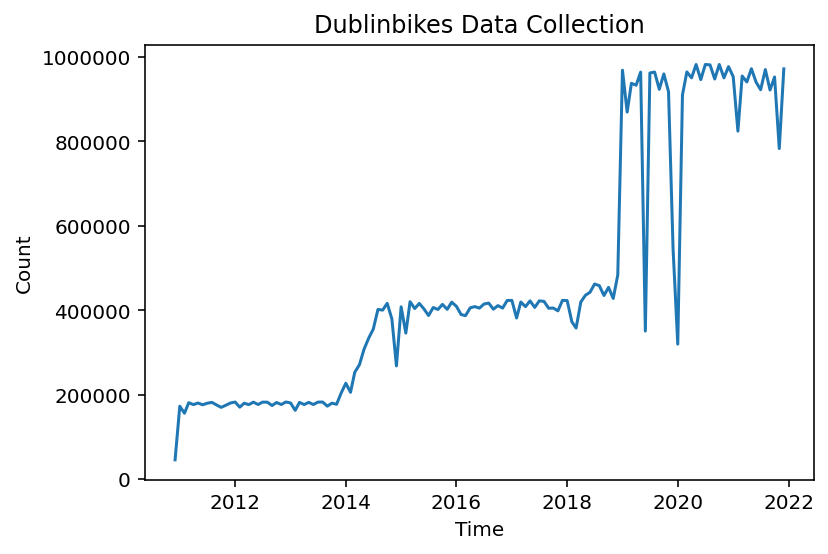

In [25]:
# Visualising the data entries for each year 

# Removing the year 2022 as we are donot have complete dataset for that year
diff1 = combined_11_22[combined_11_22['year']!=2022] 
diff1 = diff1.groupby(['year','month'])
diff2 = diff1['available_bikes'].agg(['count'])['count'].reset_index(level=['year','month'])
diff3 = pd.to_datetime(diff2['year'].astype(str) + '/' + diff2['month'].astype(str))
plt.plot(list(diff3), list(diff2['count']))
plt.title('Dublinbikes Data Collection')
plt.xlabel('Time')
plt.ylabel('Count');
plt.ticklabel_format(style='plain', axis='y')

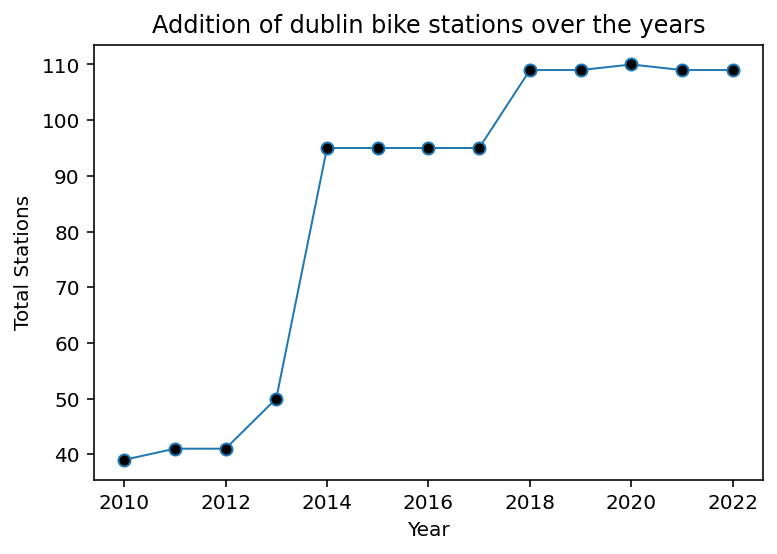

In [26]:
# Visualsing the addtion of stations over the years

stations_added = combined_11_22.groupby('year')['id'].nunique().reset_index(name ='total_stations')
stations_added['new_stations'] = stations_added['total_stations'].diff()
stations_added = stations_added.reset_index()
plt.plot(stations_added['year'],stations_added['total_stations'],linewidth = 1,marker='o', markerfacecolor='black', markersize=6)
#plt.plot(stations_added_final['year'], stations_added_final['total_stations'])
plt.title('Addition of dublin bike stations over the years')
plt.xlabel('Year')
plt.ylabel('Total Stations');

In [27]:
years = merged_data['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [28]:
# storing the transformed dataset for each year seperately to local which can be used for further analysis
for i in years:
    data = merged_data[merged_data['year'] == i];
    data.to_csv('/Users/sreevathsadb/Masters/Project/New transformed data/'+str(i)+'.csv', index=False)